# Importing Libraries

In [2]:
import os
import zipfile

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
import cv2

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D, Input, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16,ResNet50



# Importing Dataset

In [3]:
os.environ['KAGGLE_DIRECTORY'] = r'/content'

In [4]:
!kaggle datasets download -d kritikseth/fruit-and-vegetable-image-recognition


Dataset URL: https://www.kaggle.com/datasets/kritikseth/fruit-and-vegetable-image-recognition
License(s): CC0-1.0
100% 1.98G/1.98G [00:17<00:00, 182MB/s]
100% 1.98G/1.98G [00:17<00:00, 119MB/s]


# Extracting Zip File

In [5]:
#Unzipping the zip file(dataset folder)
with zipfile.ZipFile('/content/fruit-and-vegetable-image-recognition.zip', mode ='r') as zip:
     zip.extractall('data')

# Creating train, test and validation data

In [6]:
#Since the data is organized into folders by class name (fruits and vegetables), it cannot be directly loaded as two classes using ImageDataGenerator.
#Therefore, preprocessing steps are required to assign labels 0 and 1 to the data, representing fruits and vegetables respectively.
class_names = {
    'fruits' : ['banana','apple','pear','grapes','orange','kiwi','watermelon','pomegranate','pineapple','mango'],
    'vegetables' : ['cucumber','carrot','capsicum','onion','potato','lemon','tomato','raddish','beetroot','cabbage','lettuce','spinach','soy beans','cauliflower','bell pepper','turnip','corn','sweetcorn','sweetpotato','paprika','jalepeno','ginger','garlic','peas','eggplant']
}

# Training Data

In [7]:
x_train = []
y_train = []
for fruit in class_names['fruits']:
  folderpath = f'/content/data/train/{fruit}'
  images = [image for image in os.listdir(folderpath)]


  for image in images:
    filepath = f'/content/data/train/{fruit}/{image}'

    new_image = cv2.imread(filepath)
    resized_image = cv2.resize(new_image, (224,224))
    image_rgb = cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB )
    x_train.append(image_rgb)

    y_train.append(np.array([0])) #This class 0 is for fruits

In [8]:
for veg in class_names['vegetables']:
  folderpath = f'/content/data/train/{veg}'
  images = [image for image in os.listdir(folderpath)]


  for image in images:
    filepath = f'/content/data/train/{veg}/{image}'

    new_image = cv2.imread(filepath)
    if image == 'Image_56.jpg' and veg == 'bell pepper':   #corrupted image is found, which is making an error
      continue

    resized_image = cv2.resize(new_image, (224,224))
    image_rgb = cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB )
    x_train.append(image_rgb)

    y_train.append(np.array([1])) #class 1 for vegetables

In [9]:
#converting the list to an array

x_train = np.array(x_train)
y_train = np.array(y_train)

In [10]:
x_train.shape, y_train.shape

((3027, 224, 224, 3), (3027, 1))

#Data testing

In [11]:
x_test = []
y_test = []
for fruit in class_names['fruits']:
  folderpath = f'/content/data/test/{fruit}'
  images = [image for image in os.listdir(folderpath)]


  for image in images:
    filepath = f'/content/data/test/{fruit}/{image}'

    new_image = cv2.imread(filepath)
    resized_image = cv2.resize(new_image, (224,224))
    image_rgb = cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB )
    x_test.append(image_rgb)

    y_test.append(np.array([0]))

In [12]:
for veg in class_names['vegetables']:
  folderpath = f'/content/data/test/{veg}'
  images = [image for image in os.listdir(folderpath)]


  for image in images:
    filepath = f'/content/data/test/{veg}/{image}'

    new_image = cv2.imread(filepath)
    resized_image = cv2.resize(new_image, (224,224))  #resized image is already in arry format
    image_rgb = cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB )     #Converting to RGB Format
    x_test.append(image_rgb)

    y_test.append(np.array([1])) #class 1 for vegetables

In [13]:
x_test = np.array(x_test)
y_test = np.array(y_test)
print(x_test.shape, y_test.shape)

(349, 224, 224, 3) (349, 1)


## Validation set

In [14]:
x_val = []
y_val = []
for fruit in class_names['fruits']:
  folderpath = f'/content/data/validation/{fruit}'
  images = [image for image in os.listdir(folderpath)]


  for image in images:
    filepath = f'/content/data/validation/{fruit}/{image}'

    new_image = cv2.imread(filepath)
    resized_image = cv2.resize(new_image, (224,224))
    image_rgb = cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB )
    x_val.append(image_rgb)

    y_val.append(np.array([0]))


In [15]:
for veg in class_names['vegetables']:
  folderpath = f'/content/data/validation/{veg}'
  images = [image for image in os.listdir(folderpath)]


  for image in images:
    filepath = f'/content/data/validation/{veg}/{image}'

    new_image = cv2.imread(filepath)
    resized_image = cv2.resize(new_image, (224,224))
    image_rgb = cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB )
    x_val.append(image_rgb)

    y_val.append(np.array([1]))

In [16]:

x_val = np.array(x_val)
y_val = np.array(y_val)

In [17]:
x_val.shape, y_val.shape

((342, 224, 224, 3), (342, 1))

 Creating 2 different sets of resized data
 + one for the pre trained models which is of (128,128,3)
 + The other model is our one that has a (32, 32, 3) dimension,

In [18]:
x_train_32 = []
x_test_32 = []
x_val_32 = []

for img in x_train:
  new_img = cv2.resize(img,(32,32))
  x_train_32.append(new_img)

for img in x_test:
  new_img = cv2.resize(img,(32,32))
  x_test_32.append(new_img)

for img in x_val:
  new_img = cv2.resize(img,(32,32))
  x_val_32.append(new_img)

In [19]:
x_train_32 = np.array(x_train_32)
x_test_32 = np.array(x_test_32)
x_val_32 = np.array(x_val_32)

### Normalizing

In [20]:
x_train = (x_train/255.0).astype('float32')
x_test = (x_test/255.0).astype('float32')
x_val = (x_val/255.0).astype('float32')

x_train_32 = (x_train_32/255.0).astype('float32')
x_test_32 = (x_test_32/255.0).astype('float32')
x_val_32 = (x_val_32/255.0).astype('float32')

#Checking the Images in the dataset

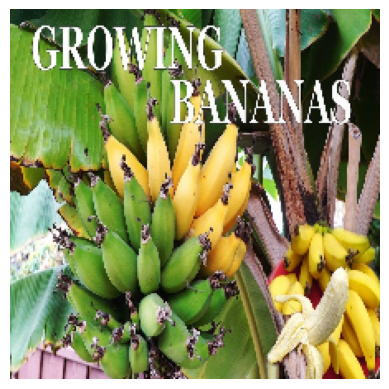

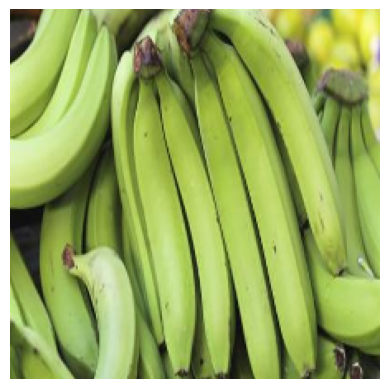

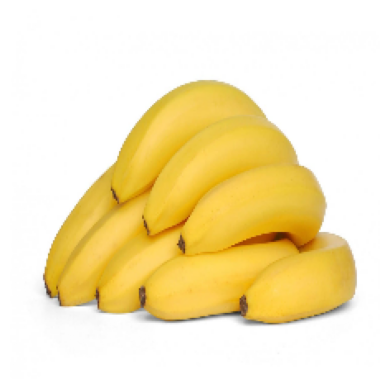

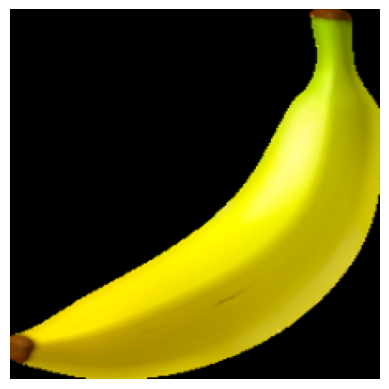

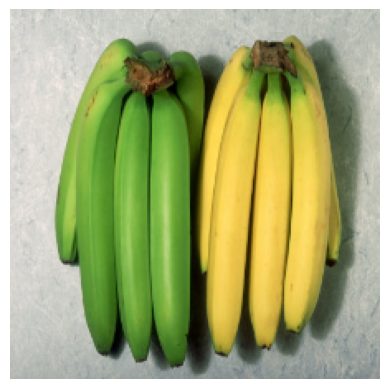

In [21]:

for i in range(5):
  plt.imshow(x_train[i])
  plt.axis('off')
  plt.show()

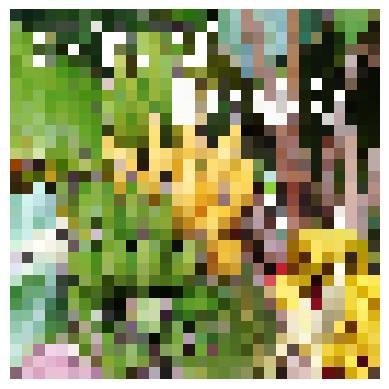

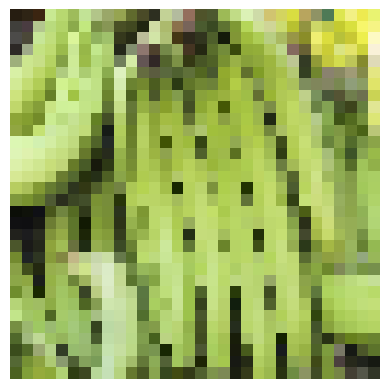

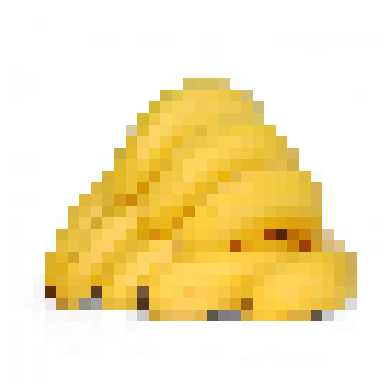

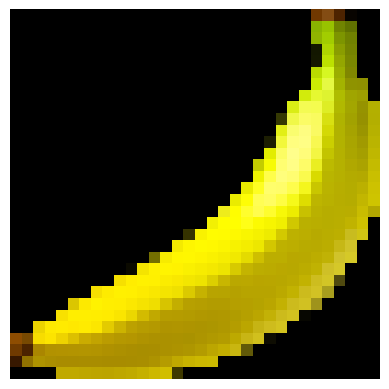

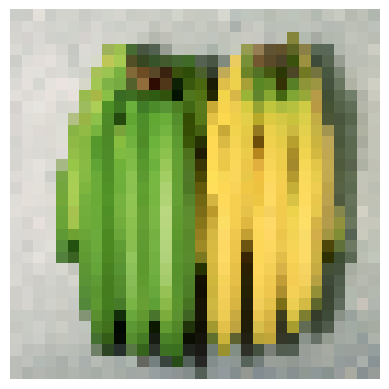

In [22]:

for i in range(5):
  plt.imshow(x_train_32[i])
  plt.axis('off')
  plt.show()

#Building Pre Trained VGG 16 architechture

In [23]:
#Preprocessing for vgg16 architechture
vgg_input = vgg16.preprocess_input(x_train)
vgg_val = vgg16.preprocess_input(x_val)
vgg_test = vgg16.preprocess_input(x_test)

In [24]:
vgg = VGG16(
    weights = 'imagenet',
    input_shape = (224,224,3),
    include_top = False
)

#Freezing the model
vgg.trainable = False

#Adding custom layers
model1 = Sequential([
    vgg,
    Flatten(),
    Dense(1024, activation = 'relu'),
    Dense(64, activation = 'relu'),
    Dense(1, activation = 'sigmoid')

])



#model compilation
model1.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [51]:
history = model1.fit(vgg_input,y_train,
           epochs = 10,
           validation_data = (vgg_val,y_val))

Epoch 1/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 16s 163ms/step - accuracy: 0.7266 - loss: 0.5905 - val_accuracy: 0.7456 - val_loss: 0.6086
Epoch 2/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 21s 165ms/step - accuracy: 0.7176 - loss: 0.6050 - val_accuracy: 0.7251 - val_loss: 0.5855
Epoch 3/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 14s 149ms/step - accuracy: 0.7326 - loss: 0.5790 - val_accuracy: 0.7164 - val_loss: 0.5845
Epoch 4/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 15s 161ms/step - accuracy: 0.7164 - loss: 0.5971 - val_accuracy: 0.7164 - val_loss: 0.6248
Epoch 5/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 19s 147ms/step - accuracy: 0.7194 - loss: 0.5901 - val_accuracy: 0.7193 - val_loss: 0.5736
Epoch 6/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 21s 154ms/step - accuracy: 0.7302 - loss: 0.5753 - val_accuracy: 0.7456 - val_loss: 0.5828
Epoch 7/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 20s 154ms/step - accuracy: 0.7367 - loss: 0.5777 - val_accuracy: 0.7222 - val_loss: 0.5748
Epoch 8/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 21s 162ms/step - accuracy: 0.7222 - loss: 0.5812 - val_accu

In [52]:
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │      25,691,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 91,985,093 (350.90 MB)

 Trainable params: 25,756,801 (98.25 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 51,513,604 (196.51 MB)

## Plotting Train and Validation Accuracy

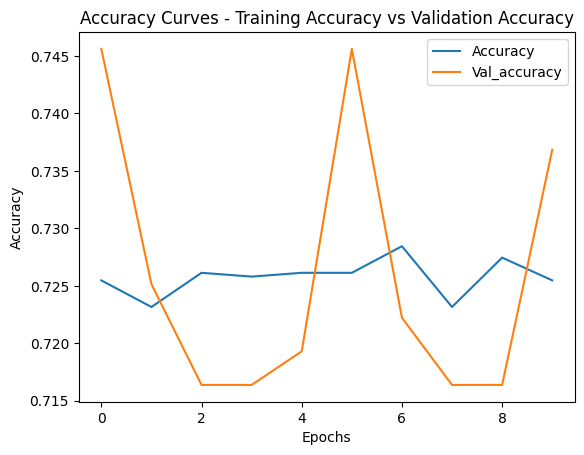

In [53]:
plt.plot(history.history['accuracy'], label = 'Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Val_accuracy')
plt.title('Accuracy Curves - Training Accuracy vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Plotting Train and Validation Loss

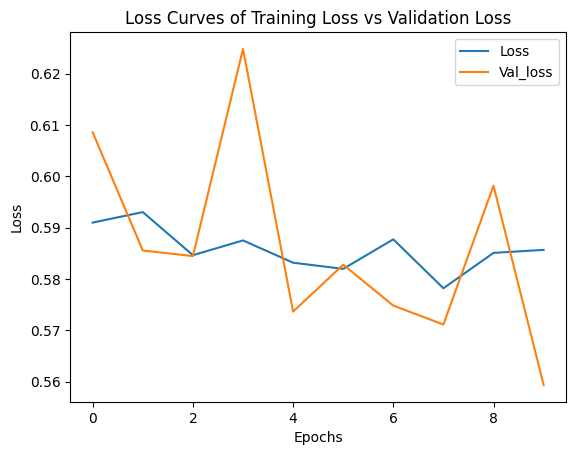

In [54]:
plt.plot(history.history['loss'], label = 'Loss')
plt.plot(history.history['val_loss'], label = 'Val_loss')
plt.title('Loss Curves of Training Loss vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Evaluating test data

In [55]:
loss,acc = model1.evaluate(vgg_test,y_test, verbose = 2)

print(f'Test Accuracy: {acc}')
print(f'Test Loss: {loss}')

11/11 - 1s - 136ms/step - accuracy: 0.7364 - loss: 0.5596
Test Accuracy: 0.736389696598053
Test Loss: 0.5595620274543762


# CNN Model

In [31]:
model = Sequential()

#Input layer
model.add(Input(shape=(32,32,3)))

#First Block
model.add(Conv2D(filters= 64,
                 kernel_size = (3,3),
                 activation = 'relu',
                 padding = 'same'))
model.add(Conv2D(filters= 64,
                 kernel_size = (3,3),
                 activation = 'relu',
                 padding = 'same'))

model.add(MaxPooling2D(pool_size=(4,4)))

#SecondBlock
model.add(Conv2D(256,(3,3), activation = 'relu',strides =(2,2)))
model.add(Conv2D(256,(3,3), activation = 'relu',padding ='same'))
model.add(MaxPooling2D(pool_size=(3,3)))



#FNN
model.add(Flatten())
model.add(Dense(256,activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))


In [41]:
model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [49]:
history1 = model.fit(x_train_32,y_train,
                    epochs = 10,
                    validation_data=(x_val_32,y_val))

Epoch 1/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 1.0000 - loss: 1.3503e-04 - val_accuracy: 0.9883 - val_loss: 0.1433
Epoch 2/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 1.1858e-04 - val_accuracy: 0.9883 - val_loss: 0.1495
Epoch 3/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 1.0000 - loss: 8.8038e-05 - val_accuracy: 0.9854 - val_loss: 0.1568
Epoch 4/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 1.0000 - loss: 5.5418e-05 - val_accuracy: 0.9854 - val_loss: 0.1589
Epoch 5/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 1.0000 - loss: 5.4078e-05 - val_accuracy: 0.9854 - val_loss: 0.1626
Epoch 6/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 2.9832e-05 - val_accuracy: 0.9854 - val_loss: 0.1612
Epoch 7/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 1.0000 - loss: 2.4870e-05 - val_accuracy: 0.9854 - val_loss: 0.1661
Epoch 8/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 1.0000 - loss: 2.0578e-05 - 

In [50]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 256)           │         147,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 3, 3, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 1, 1, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,527,685 (9.64 MB)

 Trainable params: 842,561 (3.21 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,685,124 (6.43 MB)

## Plotting train and validation loss

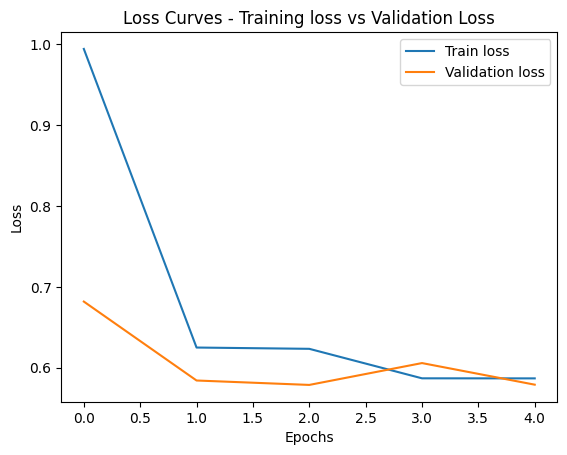

In [37]:
plt.plot(history.history['loss'], label = 'Train loss')
plt.plot(history.history['val_loss'], label = 'Validation loss')
plt.title('Loss Curves - Training loss vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Plotting Train and Validation Accuracy

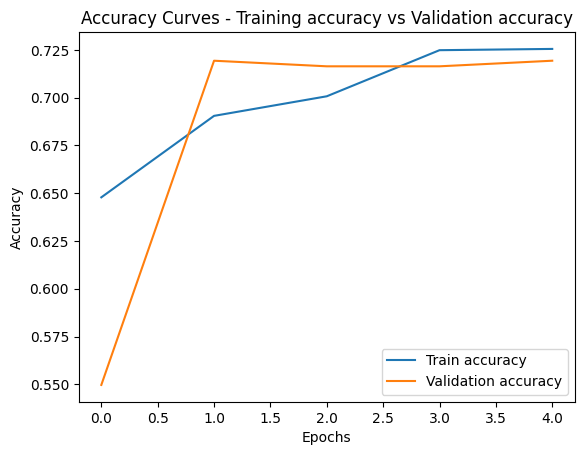

In [38]:
plt.plot(history.history['accuracy'], label = 'Train accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation accuracy')
plt.title('Accuracy Curves - Training accuracy vs Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Evaluating Test Data

In [44]:
test_loss,test_acc = model.evaluate(x_test_32,y_test, verbose = 2)

11/11 - 0s - 28ms/step - accuracy: 0.9885 - loss: 0.1368


In [47]:
print(f'Test Accuracy: {test_acc}')
print(f'Test Loss: {test_loss}')

Test Accuracy: 0.9885386824607849
Test Loss: 0.13676705956459045
